# Importing libraries

In [1]:
from spotipy.oauth2 import SpotifyClientCredentials
import config 
import spotipy
import json

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.c_id,
                                                        client_secret= config.c_se))



In [2]:
import pandas as pd
import numpy as np
from plotly import express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

# 1. Importing our song dataframe

In [3]:
spotipy = pd.read_csv('project6.csv', sep=',')
spotipy.drop(columns=['Unnamed: 0'], inplace=True)
spotipy.drop_duplicates(inplace=True)

# 2. Scaling/normalizing the features of our dataframe

In [4]:
scaler = StandardScaler()
my_scaler = scaler.fit(spotipy[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']])
X_normalized = my_scaler.transform(spotipy[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']])
df_normalized = pd.DataFrame(X_normalized, columns=['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms'])

# 3. Performing a PCA on dataframe 

In [5]:
#PCA = 10 because the number of columns = 10
pca = PCA(n_components=10)
pca.fit(X_normalized)
pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)
X_pca = pca.transform(X_normalized)

# Finding the K-means

Training a K-Means model with 1 clusters! 

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

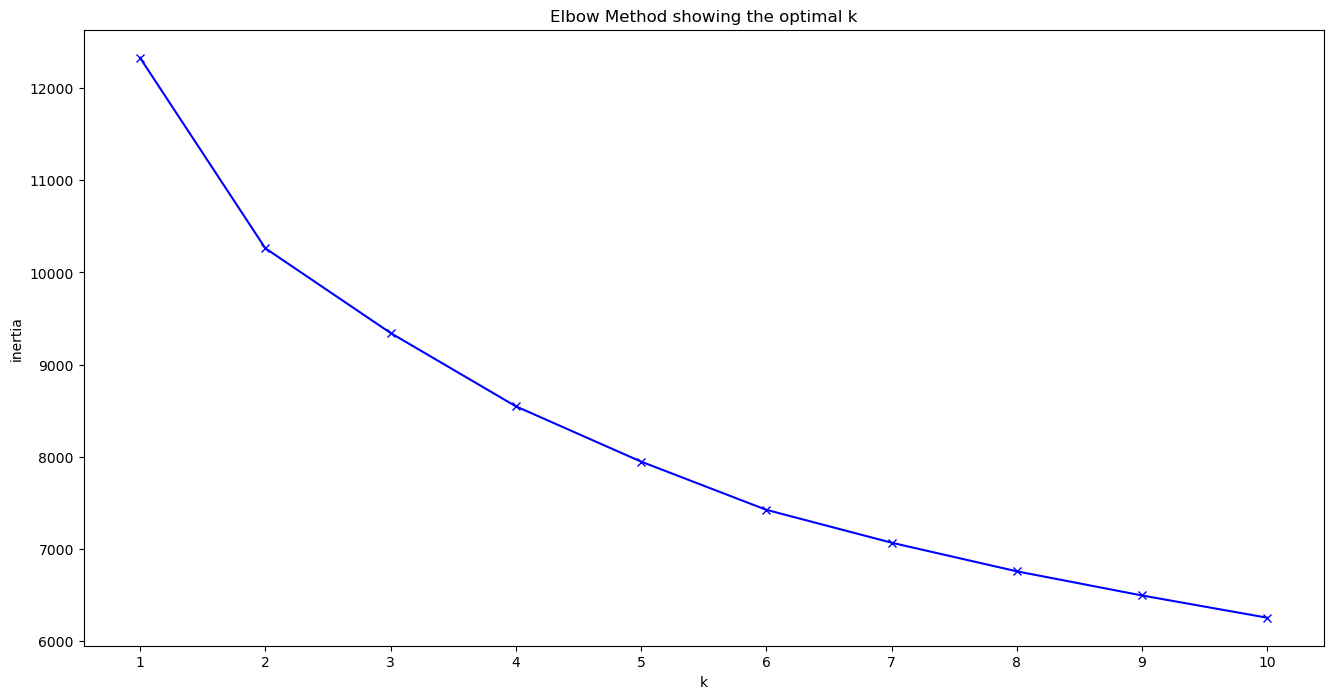

In [6]:
#Finding our K-means from elbow graph
K = range(1, 11) #range of the clusters
inertia = []

for k in K: #for every data in set build a inertia
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0)) #changing the scale
plt.title('Elbow Method showing the optimal k') 

In [7]:
#Number of cluster = 4!

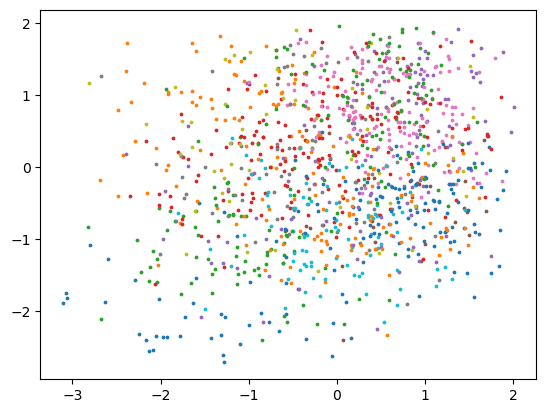

In [8]:
kmeans.fit(X_pca)
#Computing our clusters 
cluster_ids = kmeans.predict(X_pca)
cluster_distances = kmeans.transform(X_pca)
cluster_ids = KMeans(n_clusters=15, n_init=10).fit_predict(X_normalized)
for c in np.unique(cluster_ids):
    plt.scatter(X_normalized[cluster_ids == c, 0], X_normalized[cluster_ids == c, 1], marker='.', s=12)

In [9]:
#Assigning our clusters to our dataframes
spotipy["cluster"] = cluster_ids
df_normalized["cluster"] = cluster_ids

In [10]:
df_normalized[df_normalized["cluster"] == 13]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
1,0.353842,-0.159021,0.386344,1.364538,0.749816,0.527161,-0.522848,-0.981831,-1.347936,-0.967044,13
18,0.916614,0.955308,1.257223,1.655539,-0.396680,-0.862048,-0.266441,-0.367079,-0.748777,-0.625990,13
23,1.711457,0.435917,0.627570,1.706148,-0.561680,-0.862048,-0.765010,1.007522,-0.864230,-0.178108,13
44,0.684543,0.761717,1.024475,0.845796,-0.862490,-0.345808,-0.675793,0.461500,-0.744616,-1.881902,13
46,1.456179,0.525630,1.359211,2.515891,-0.274205,-0.862048,1.000600,0.385133,-0.975711,-0.375355,13
68,1.490989,0.539796,1.601978,2.579152,-0.379669,-0.862048,0.963113,0.530230,-0.975823,-0.377192,13
79,0.997839,0.908091,1.631778,1.997149,-0.328638,-0.861149,-0.781504,-0.015792,-0.994940,0.055683,13
97,1.171892,1.677733,0.767065,1.250668,-0.702865,0.037022,-0.288933,0.419499,0.148124,-0.195610,13
104,1.862303,0.969473,0.602651,2.313455,-0.866437,1.185512,0.423309,-0.386170,0.150898,-0.770625,13
109,0.394455,0.893925,1.708590,3.414200,-0.695721,-0.862035,-0.912707,1.209894,-1.321396,-0.168476,13


# Saving our scaler and model in a Pickle file

In [11]:
import pickle

with open("scaler.pickle", "wb") as f: #saves the model in dir and file name given
    pickle.dump(my_scaler,f)
with open("model.pickle", "wb") as f: #saves the model in dir and file name given
    pickle.dump(kmeans,f)

# Exporting dataframe file to csv

In [14]:
spotipy.to_csv("spotipy.csv", mode="a", index=True)